![NLP](https://pbs.twimg.com/media/Fmi6YQNWYAAjXSc?format=jpg&name=medium)

<b> Problem Statement: </b>
* Food Computing Field of Research
* Our Project's goal:
    * detection of recipe ingredients inside of collected comments
    * preparing a dataset of recipes with 18k+ real users comments

![NLP](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Import the Recipes Review Dataset  </font>

![NLP](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>1.1.1: Check Working Directory </font>

In [1]:
import os
os.getcwd()

'C:\\Users\\User\\Documents\\Studia\\NLP\\project2'

#### <font color = blue>1.1.2: Import the Libraries

In [31]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.text import Text
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from tqdm import tqdm

plt.style.use("fivethirtyeight")

#### <font color = blue>1.1.3: Load the Dataset

In [3]:
df = pd.read_csv('Reviews.csv')
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


![NLP](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Exploratory Data Analysis </font>

![NLP](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue> 2.1: Size of Data

In [5]:
df.size

5684540

####  <font color = blue> 2.2: How many numbers of observations and features</font>

In [6]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 568454
Number of Features: 10


####  <font color = blue> 2.3 Features that we have in this data</font>

In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

####  <font color = blue> 2.4 Type of Data </font>

In [8]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

#### <font color = blue> 2.5 Data Info</font>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


#### <font color = blue> 2.7 Reviews Length Distribution </font>

In [10]:
df.Text = df.Text.astype(str)

In [12]:
df['review_len'] = df["Text"].apply(lambda x: len(x))

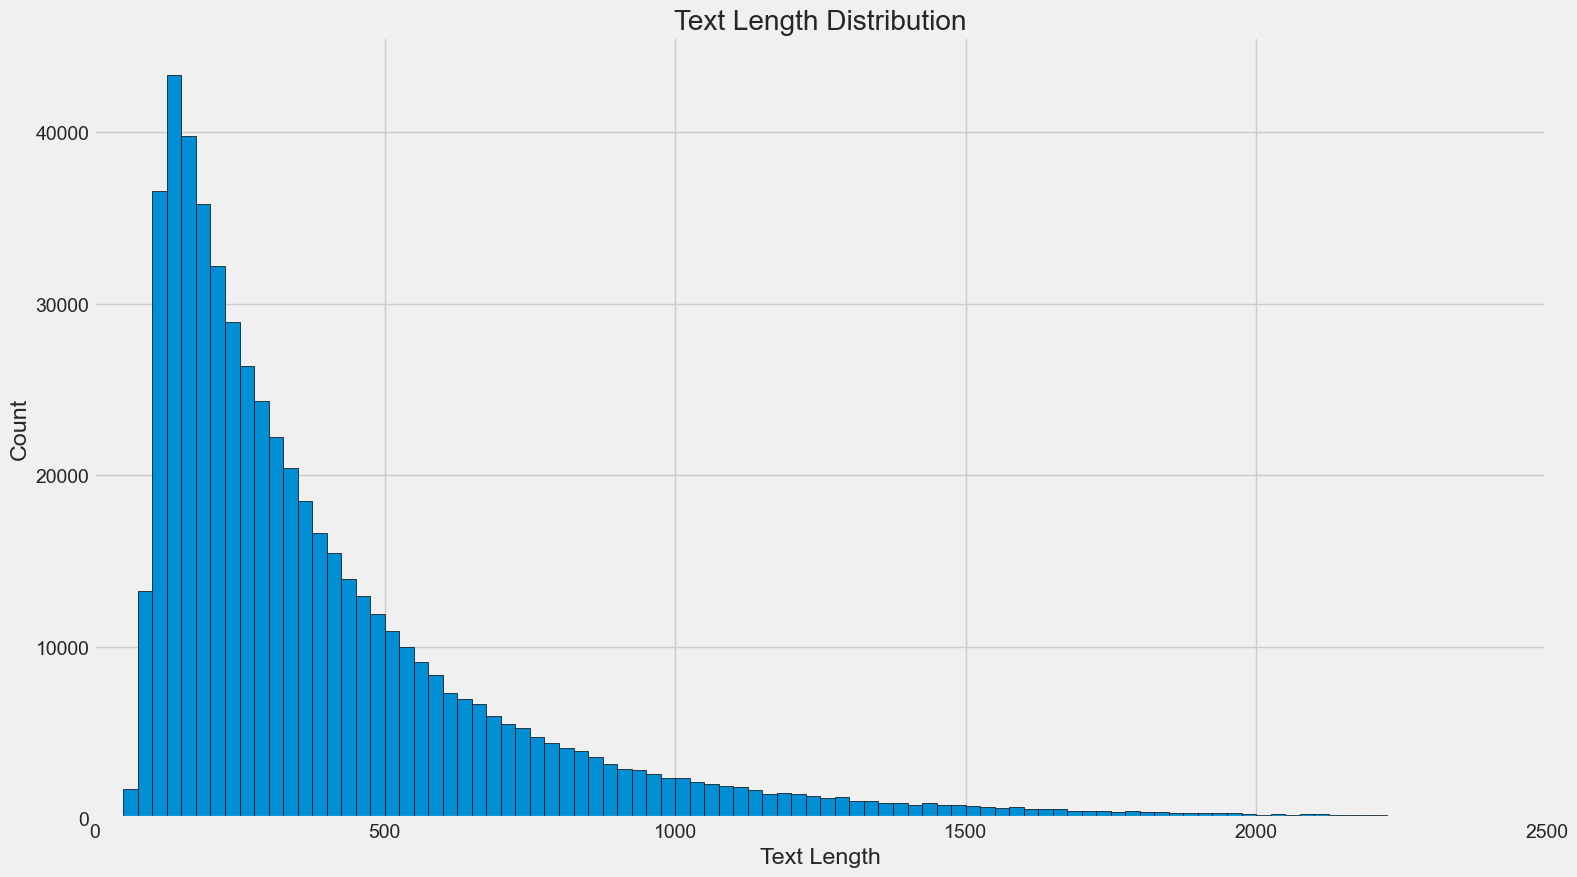

In [19]:
plt.figure(figsize = (16, 9))
bins_ = 100
plt.hist(df['review_len'], bins = np.linspace(0, 2500, bins_+1), edgecolor = 'black')

plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Count')

plt.xlim(0, 2500)

plt.tight_layout()
plt.show()

#### <font color = blue> 2.8 Word Count Distribution </font>

In [21]:
df['word_count'] = df["Text"].apply(lambda x: len(x.split()))

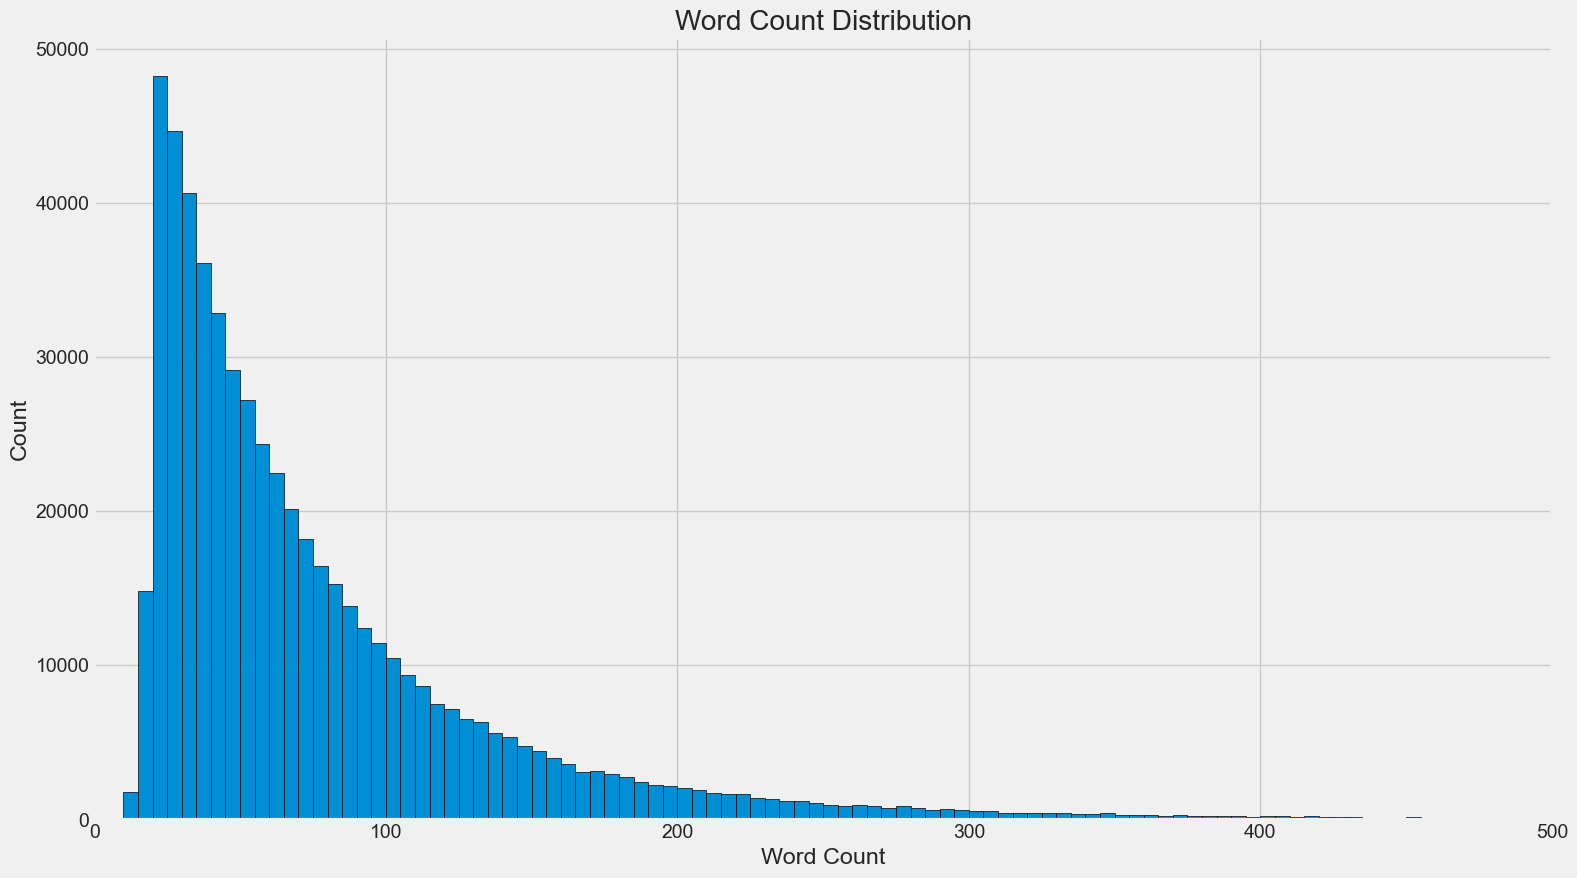

In [26]:
plt.figure(figsize = (16, 9))
bins_ = 100
plt.hist(df['word_count'],bins = np.linspace(0, 500, bins_+1), edgecolor = 'black')

plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Count')

plt.xlim(0, 500)

plt.tight_layout()
plt.show()

In [27]:
np.max(df.word_count)

3432

#### <font color = blue> 2.9 Review Rating Distribution </font>

<AxesSubplot: title={'center': 'Percentage of Ratings'}, ylabel='Score'>

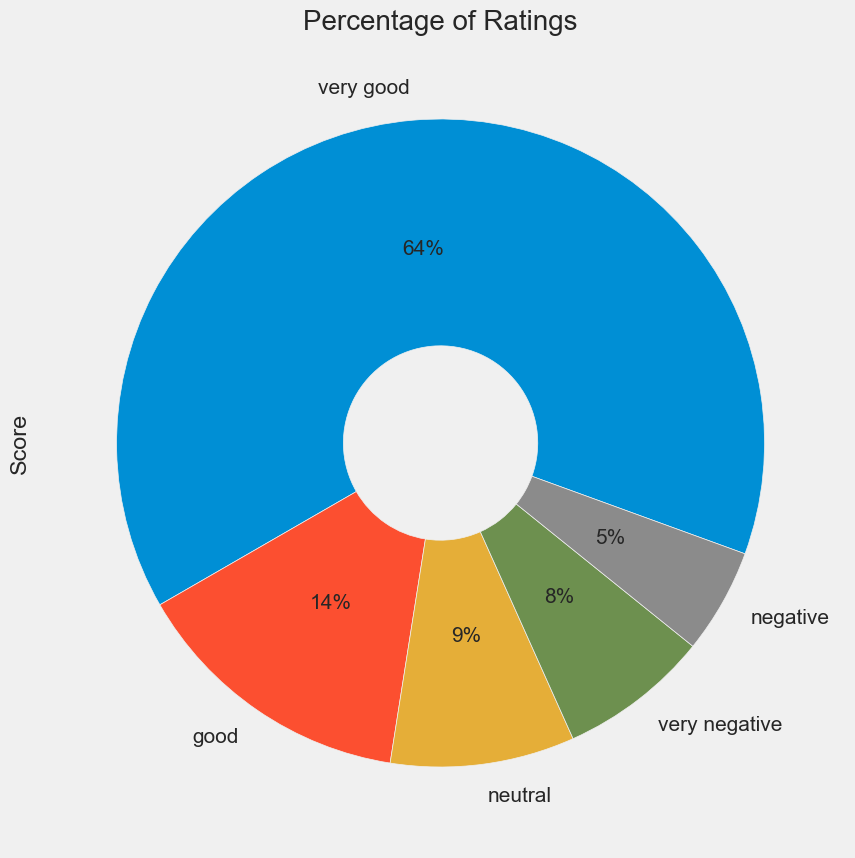

In [28]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
df.Score.value_counts().plot(kind='pie', labels=['very good', 'good', 'neutral', 'very negative', 'negative'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

#### <font color = blue> 2.10 Sentiment Polarity Distribution </font>

In [32]:
# df['polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['polarity'] = [TextBlob(x).sentiment.polarity for x in tqdm(df['Text'])]

100%|██████████| 568454/568454 [04:00<00:00, 2359.46it/s]


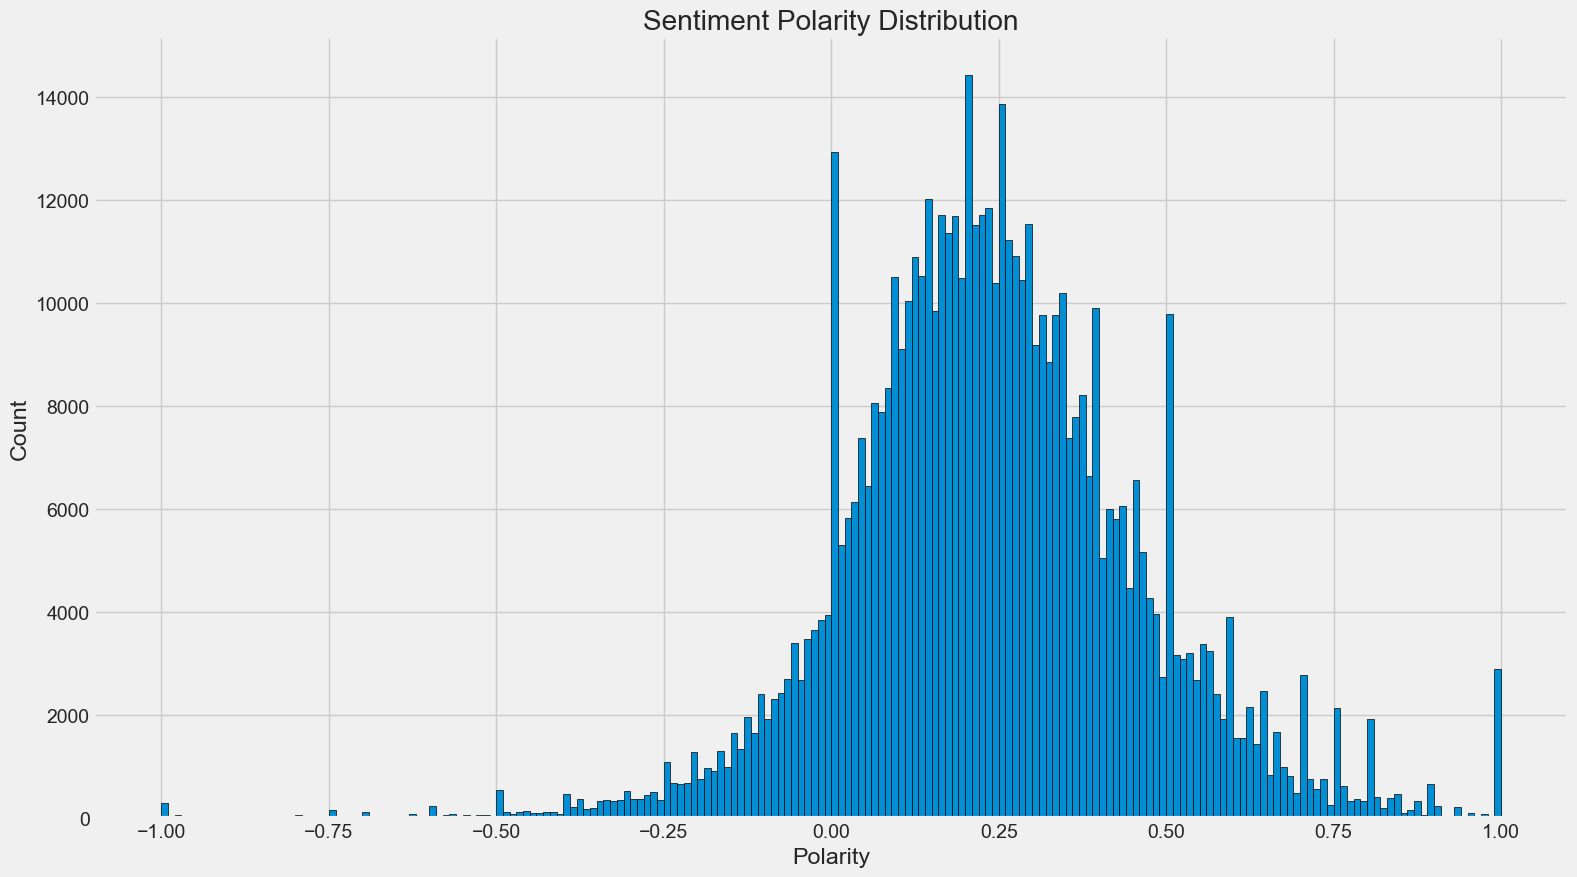

In [33]:
plt.figure(figsize = (16, 9))

plt.hist(df['polarity'], bins = 200, edgecolor = 'black')

plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### <font color = blue> 2.11 Wordcloud of Recipes Review </font>

In [36]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in tqdm(df.Text):
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

  8%|▊         | 47429/568454 [00:13<02:24, 3609.22it/s] 


KeyboardInterrupt: 

![NLP Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Data Preprocessing </font>
In this part, we did data preprocessing. firstly, we did text cleaning with the help of Regular Expression and then we apply preprocessing operations like Tokenization to make a token of each sentence, then remove stop words like "the", "a", "at" etc and then apply stemming to reducing a word to its word stem.

![NLP](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46> Text Cleaning </font>
> <b>Lowercase <br> Remove Punctuation <br> Remove Special Characters <br> Remove Digits </b>

#### <font color = blue>3.1.1: Lower Case

In [117]:
def lower_case(text):
    return text.lower()

df['text'] = df['text'].apply(lower_case)

#### <font color = blue>3.1.2: Remove Punctuation

In [118]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['text'] = df['text'].apply(remove_punct)

#### <font color = blue>3.1.3: Remove Special Characters

In [119]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['text'] = df['text'].apply(remove_special)

#### <font color = blue>3.1.4: Remove Digits

In [120]:
def remove_digits(text):
    return re.sub(r'\d+', '', text)

df['text'] = df['text'].apply(remove_digits)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.2: </font> <font color = #41EA46>  Preprocessing Operations </font>
> <b>Tokenizing <br> Removing Stop Words <br> Lemmatization <b>

#### <font color = blue>3.2.1: Tokenizing

In [121]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [122]:
def tokenize(text):
    text = word_tokenize(text)
    return text

df['text'] = df['text'].apply(tokenize)

#### <font color = blue>3.2.2: Removing StopWords

In [123]:
from nltk.corpus import stopwords

In [124]:
def remove_stop(text):
    text  = [i for i in text if not i in stopwords.words('english')]
    return text

df['text'] = df['text'].apply(remove_stop)

#### <font color = blue>3.2.3: Lemmatization

In [125]:
from nltk.stem import WordNetLemmatizer

In [126]:
def Lemmatize(text):
    word_lem = WordNetLemmatizer()
    text = [word_lem.lemmatize(token) for token in text]
    return text

df['text'] = df['text'].apply(Lemmatize)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.3: </font> <font color = #41EA46>  Feature Extraction</font>
> <b>TF-IDF Model <b>

#### <font color = blue>3.3.1 import TF-IDF model from sklearn

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### <font color = blue>3.3.2 Init the TF-IDF model and take 2000 most frequent words from dictionaries

In [128]:
vectorizer = TfidfVectorizer(max_features= 2000)

#### <font color = blue>3.3.3 remove the list inside tweet cols which was create due to tokenization

In [129]:
list_to_str = []
for lists in df['text']:
    list_to_str.append(' '.join(map(str, lists)))

df['text'] = list_to_str

#### <font color = blue>3.3.4 fit corpus data into Tf-IDF Model

In [132]:
text = vectorizer.fit_transform(df['text']).toarray()

#### <font color = blue>3.3.5 shape of predictor after Feature Engineering

In [133]:
text.shape

(1412, 2000)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.4: </font> <font color = #41EA46>  Split the Dataset</font>

In [135]:
from sklearn.model_selection import train_test_split

In [193]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### <font color = blue> 3.4.1: Split the dataset into Train and Test

In [196]:
X, Y = text, target_onehot
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#### <font color = blue> 3.4.2: Training Data

In [197]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (988, 2000)
y_train (988, 5)


#### <font color = blue> 3.4.3: Testing Data

In [198]:
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_test (424, 2000)
y_test (424, 5)


![NLP Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Build fastText Model</font>

![NLP Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [272]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [273]:
df['text'][]

0       description say maybe cream cheese cream chees...
1       terrible followed recipe exactly tasted fine a...
2       im always amazed people rate recipe state chan...
3       didnt like creamy rich didnt feel good sour cr...
4                even using green chilies much hot u like
                              ...                        
1407    good omitted green chilies dont like lot heat ...
1408    cut calorie fat way using nonfat sour cream su...
1409    wonderful recipe used oz light cream cheese in...
1410    good thing would leave salt use lower sodium b...
1411    quick easy make family asks time dont add gree...
Name: text, Length: 1412, dtype: object

In [276]:
### Dataset Preprocessing

corpus = []
for i in range(0, len(df)):
    #print(i)
    #review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    #review = review.lower()
    #review = review.split()
    
    review = df['text'][i]
    review = ''.join(review)
    corpus.append(review)

In [277]:
corpus

['description say maybe cream cheese cream cheese recipe ingredient say sour cream whipping cream cream cheese',
 'terrible followed recipe exactly tasted fine added sour cream whipping cream turned thin white flavorless soup bother',
 'im always amazed people rate recipe state changed recipe significantly reading comment ive read im sure whether even try recipe people cant recipe without changing beyond know real recipe like even begin rate',
 'didnt like creamy rich didnt feel good sour cream amp whipping cream overkill wouldve better whipping cream',
 'even using green chilies much hot u like',
 'possibly soup renamed bean soup would fitting soup way white chili soup dissapointing',
 'made would like know recipe follow one make original recipe many star get',
 'far worse recipe used banana breadit call way much oili bake dog treat living smell better bread',
 'always bake banana bread recipe fool proofi tried recipe last night sorry say good one took hour still soggy maybe put le bu

In [278]:
voc_size = 5000

In [279]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[4789,
  352,
  3306,
  2339,
  1345,
  2339,
  1345,
  4052,
  2978,
  352,
  2763,
  2339,
  3544,
  2339,
  2339,
  1345],
 [3902,
  455,
  4052,
  48,
  1322,
  4987,
  3353,
  2763,
  2339,
  3544,
  2339,
  501,
  1794,
  1886,
  1347,
  2161,
  4939],
 [3799,
  772,
  1108,
  1678,
  299,
  4052,
  2250,
  4766,
  4052,
  1754,
  4439,
  2440,
  1012,
  3492,
  3799,
  1169,
  439,
  3580,
  2273,
  4052,
  1678,
  3388,
  4052,
  2882,
  3435,
  2947,
  4914,
  934,
  4052,
  4298,
  3580,
  4862,
  299],
 [2823,
  4298,
  4270,
  3440,
  2823,
  4265,
  4804,
  2763,
  2339,
  4868,
  3544,
  2339,
  1965,
  3612,
  2599,
  3544,
  2339],
 [3580, 3726, 833, 3651, 274, 376, 1244, 4298],
 [2066,
  2161,
  2001,
  4942,
  2161,
  2807,
  1311,
  2161,
  3432,
  1886,
  1387,
  2161,
  3990],
 [1543, 2807, 4298, 4914, 4052, 1193, 3283, 1668, 215, 4052, 2064, 273, 3818],
 [2652,
  2257,
  4052,
  1465,
  4633,
  2436,
  3392,
  3432,
  274,
  340,
  2585,
  291,
  2585,
  983,
  1

In [281]:
sent_length=30
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2339 2339 1345]
 [   0    0    0 ... 1347 2161 4939]
 [1678  299 4052 ... 3580 4862  299]
 ...
 [   0    0    0 ... 1079 3432 1302]
 [   0    0    0 ... 1211 4683 3183]
 [   0    0    0 ... 2189 1091 1732]]


In [287]:
embedded_docs[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 2066, 2161, 2001, 4942, 2161,
       2807, 1311, 2161, 3432, 1886, 1387, 2161, 3990])

In [288]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 40)            200000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               56400     
                                                                 
 dense_2 (Dense)             (None, 5)                 505       
                                                                 
Total params: 256,905
Trainable params: 256,905
Non-trainable params: 0
_________________________________________________________________
None


In [289]:
len(embedded_docs),y.shape

(1412, (1412, 5))

In [290]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [291]:
X_final.shape,y_final.shape

((1412, 30), (1412, 5))

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [293]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
15/15 [==============================] - 21s 161ms/step - loss: 1.6057 - accuracy: 0.2326 - val_loss: 1.6051 - val_accuracy: 0.2575
Epoch 2/10
15/15 [==============================] - 1s 79ms/step - loss: 1.5829 - accuracy: 0.3499 - val_loss: 1.5903 - val_accuracy: 0.2811
Epoch 3/10
15/15 [==============================] - 1s 78ms/step - loss: 1.5153 - accuracy: 0.3975 - val_loss: 1.4828 - val_accuracy: 0.3455
Epoch 4/10
15/15 [==============================] - 1s 77ms/step - loss: 1.3614 - accuracy: 0.4345 - val_loss: 1.3525 - val_accuracy: 0.4099
Epoch 5/10
15/15 [==============================] - 1s 73ms/step - loss: 1.2061 - accuracy: 0.5307 - val_loss: 1.2414 - val_accuracy: 0.4485
Epoch 6/10
15/15 [==============================] - 1s 75ms/step - loss: 1.0118 - accuracy: 0.5909 - val_loss: 1.2708 - val_accuracy: 0.4592
Epoch 7/10
15/15 [==============================] - 1s 75ms/step - loss: 0.8480 - accuracy: 0.6786 - val_loss: 1.3725 - val_accuracy: 0.4506
Epoch 8/10


In [259]:
df_ = df[['text', 'stars']]
df_.head()

,text,stars
0,description say maybe cream cheese cream chees...,1
1,terrible followed recipe exactly tasted fine a...,1
2,im always amazed people rate recipe state chan...,1
3,didnt like creamy rich didnt feel good sour cr...,1
4,even using green chilies much hot u like,1


In [260]:
df_labeled = df_.copy()
df_labeled['stars'] = '__label__' + df_labeled['stars'].astype(str)
df_labeled.head()

,text,stars
0,description say maybe cream cheese cream chees...,__label__1
1,terrible followed recipe exactly tasted fine a...,__label__1
2,im always amazed people rate recipe state chan...,__label__1
3,didnt like creamy rich didnt feel good sour cr...,__label__1
4,even using green chilies much hot u like,__label__1


In [261]:
data = df_labeled['stars'] + " " + df_labeled['text']
print(data)

0       __label__1 description say maybe cream cheese ...
1       __label__1 terrible followed recipe exactly ta...
2       __label__1 im always amazed people rate recipe...
3       __label__1 didnt like creamy rich didnt feel g...
4       __label__1 even using green chilies much hot u...
                              ...                        
1407    __label__5 good omitted green chilies dont lik...
1408    __label__5 cut calorie fat way using nonfat so...
1409    __label__5 wonderful recipe used oz light crea...
1410    __label__5 good thing would leave salt use low...
1411    __label__5 quick easy make family asks time do...
Length: 1412, dtype: object


In [263]:
print(len(data))
count = 0
for line in range(len(data)-1, -1, -1):
    match = re.search(r'\d\d\d\d\d\d\d\d\d\d', data[line])
    try:
        if not match.group() == "":
            data = data.drop(line)
            count+=1
    except:
        count += 0
print(count)
print(len(data))

1412
0
1412


In [264]:
train, test = train_test_split(data, test_size=0.3, train_size=0.7, random_state=42)

In [266]:
import numpy

In [267]:
#write test and train into files
f_train = open("train.txt", "a")
for i in range(len(numpy.array(train))):
    f_train.write(numpy.array(train)[i] + "\n")
f_train.close()

f_test = open("test.txt", "a")
for i in range(len(numpy.array(test))):
    f_test.write(numpy.array(test)[i] + "\n")
f_test.close()

In [269]:
import fasttext

ModuleNotFoundError: No module named 'fasttext'

In [270]:
pip install fasttext

  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Running setup.py clean for fasttext
Failed to build fasttext
    Running setup.py install for fasttext: started
    Running setup.py install for fasttext: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\amira\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\amira\\AppData\\Local\\Temp\\pip-install-9vfiotp4\\fasttext_5ed12eb5fbc24fca8ceed49fecab1c45\\setup.py'"'"'; __file__='"'"'C:\\Users\\amira\\AppData\\Local\\Temp\\pip-install-9vfiotp4\\fasttext_5ed12eb5fbc24fca8ceed49fecab1c45\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\amira\AppData\Local\Temp\pip-wheel-kzx_7qey'
       cwd: C:\Users\amira\AppData\Local\Temp\pip-install-9vfiotp4\fasttext_5ed12eb5fbc24fca8ceed49fecab1c45\
  Complete output (20 lines):
  C:\Users\amira\anaconda3\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-separated 'desc

In [268]:
model = fasttext.train_supervised(input="train.txt")

NameError: name 'fasttext' is not defined